In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv("C:\\Users\\Gouri\\Downloads\\force2020_data.csv")
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [10]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [14]:
df.duplicated().sum()

0

In [16]:
df.columns.duplicated()

array([False, False, False, False, False, False])

In [18]:
df.isna().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [20]:
df.fillna(df.mean(),inplace=True)

In [22]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,0.404547,20.915468,161.131180
1,1.889794,79.262886,494.680,0.404547,19.383013,160.603470
2,1.896523,74.821999,494.832,0.404547,22.591518,160.173615
3,1.891913,72.878922,494.984,0.404547,32.191910,160.149429
4,1.880034,71.729141,495.136,0.404547,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,3.463851,125.106178
18266,2.643114,21.444370,3271.568,0.185574,3.463851,125.106178
18267,2.681300,22.646879,3271.720,0.176074,3.463851,125.106178
18268,2.738337,22.253584,3271.872,0.174617,3.463851,125.106178


In [24]:
df.isna().sum()

RHOB        0
GR          0
DEPTH_MD    0
NPHI        0
PEF         0
DTC         0
dtype: int64

### Preprocessing

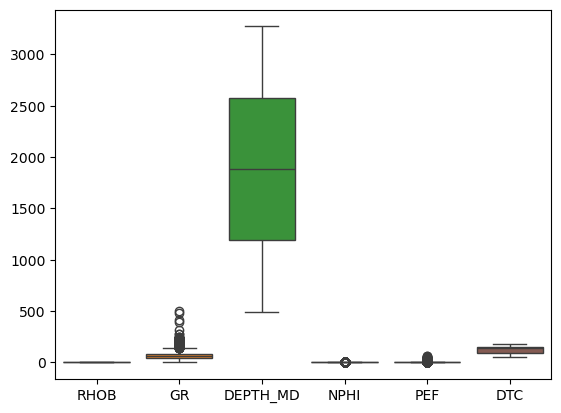

In [27]:
sns.boxplot(df)
plt.show()

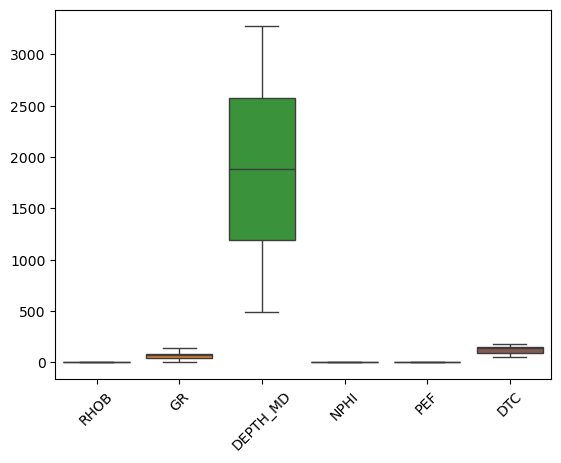

In [29]:
def remove_outliers (df,column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    upper_bound = q3 + 1.5 * IQR
    lower_bound = q1 - 1.5 * IQR
    df[column_name] =   df[column_name].clip(upper = upper_bound)
    df[column_name] =   df[column_name].clip(lower = lower_bound)
    return df[column_name]

for col in df:
    df[col] = remove_outliers(df,col)

sns.boxplot(df)
plt.xticks(rotation = 45)
plt.show()

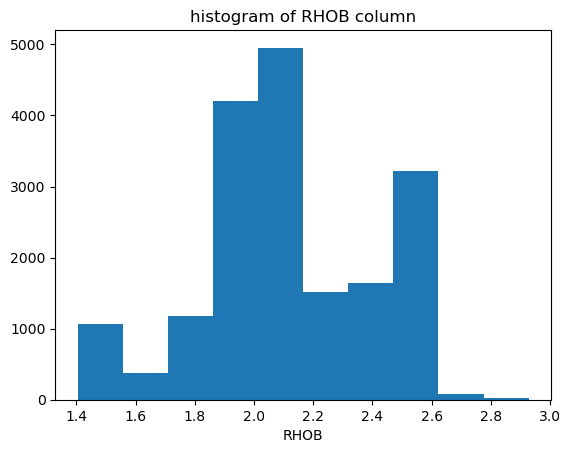

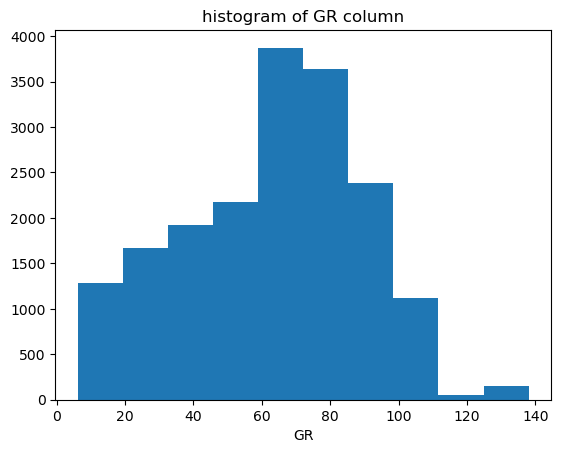

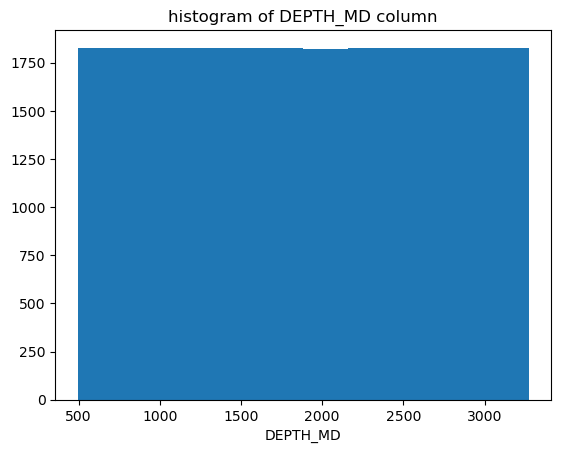

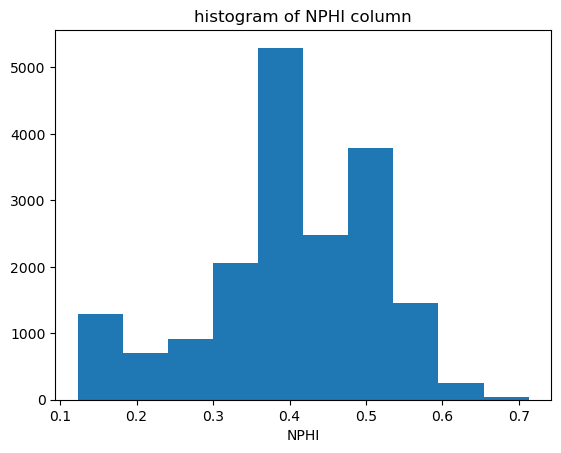

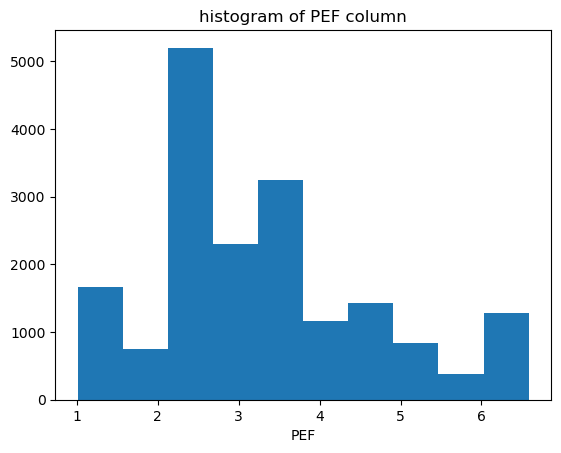

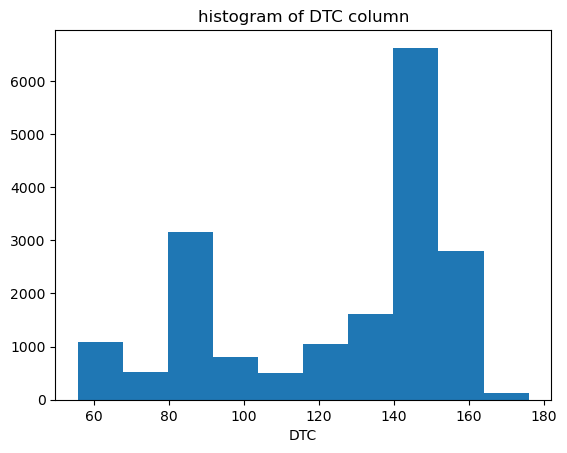

In [31]:
for column_name in df:
    plt.hist(df[column_name])
    plt.title("histogram of {} column".format(column_name))
    plt.xlabel(column_name)
    plt.show()

### Scaling

In [34]:
std_scaler = StandardScaler()

In [52]:
df['Std_RHOB'] = std_scaler.fit_transform(df[['RHOB']])
df['Std_GR'] = std_scaler.fit_transform(df[['GR']])
df['Std_DEPTH_MD'] = std_scaler.fit_transform(df[['DEPTH_MD']])
df['Std_NPHI'] = std_scaler.fit_transform(df[['NPHI']])
df['Std_PEF'] = std_scaler.fit_transform(df[['PEF']])
df['Std_DTC'] = std_scaler.fit_transform(df[['DTC']])

In [54]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Std_RHOB,Std_GR,Std_DEPTH_MD,Std_NPHI,Std_PEF,Std_DTC
0,-0.759999,0.648114,-1.731721,-0.008241,2.358218,1.179232e+00,-0.759999,0.648114,-1.731721,-0.008241,2.358218,1.179232e+00
1,-0.741163,0.612133,-1.731532,-0.008241,2.358218,1.161958e+00,-0.741163,0.612133,-1.731532,-0.008241,2.358218,1.161958e+00
2,-0.718560,0.441774,-1.731342,-0.008241,2.358218,1.147887e+00,-0.718560,0.441774,-1.731342,-0.008241,2.358218,1.147887e+00
3,-0.734045,0.367235,-1.731152,-0.008241,2.358218,1.147096e+00,-0.734045,0.367235,-1.731152,-0.008241,2.358218,1.147096e+00
4,-0.773944,0.323128,-1.730963,-0.008241,2.358218,1.146405e+00,-0.773944,0.323128,-1.730963,-0.008241,2.358218,1.146405e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
18265,1.745819,-1.683564,1.731081,-1.901628,0.124652,4.651740e-16,1.745819,-1.683564,1.731081,-1.901628,0.124652,4.900644e-16
18266,1.789158,-1.605864,1.731271,-1.921165,0.124652,4.651740e-16,1.789158,-1.605864,1.731271,-1.921165,0.124652,4.900644e-16
18267,1.917421,-1.559734,1.731461,-2.004161,0.124652,4.651740e-16,1.917421,-1.559734,1.731461,-2.004161,0.124652,4.900644e-16
18268,2.109002,-1.574822,1.731650,-2.016885,0.124652,4.651740e-16,2.109002,-1.574822,1.731650,-2.016885,0.124652,4.900644e-16


In [56]:
from sklearn.cluster import KMeans

In [88]:
x=df[['NPHI','GR']]
x.head()

,NPHI,GR
0,-0.008241,0.648114
1,-0.008241,0.612133
2,-0.008241,0.441774
3,-0.008241,0.367235
4,-0.008241,0.323128


In [90]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

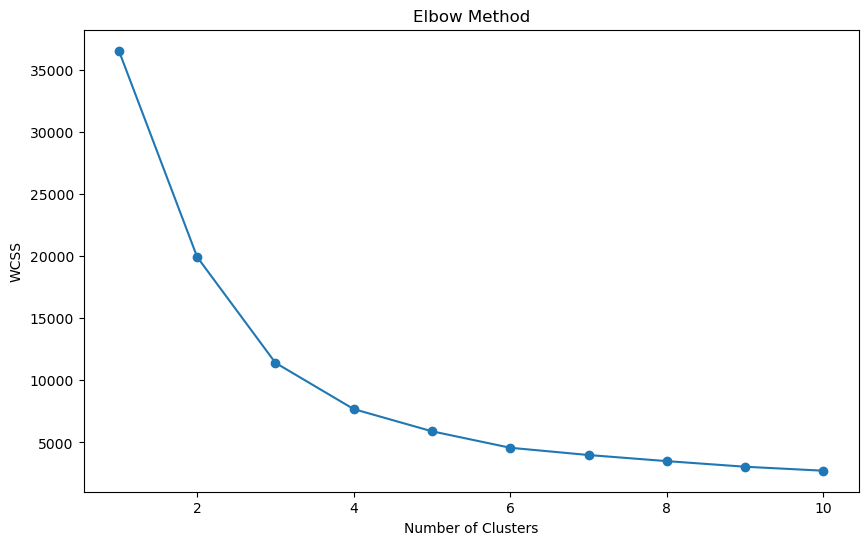

In [91]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [94]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

In [96]:
df['Cluster'] = y_kmeans
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Std_RHOB,Std_GR,Std_DEPTH_MD,Std_NPHI,Std_PEF,Std_DTC,Cluster
0,-0.759999,0.648114,-1.731721,-0.008241,2.358218,1.179232e+00,-0.759999,0.648114,-1.731721,-0.008241,2.358218,1.179232e+00,1
1,-0.741163,0.612133,-1.731532,-0.008241,2.358218,1.161958e+00,-0.741163,0.612133,-1.731532,-0.008241,2.358218,1.161958e+00,1
2,-0.718560,0.441774,-1.731342,-0.008241,2.358218,1.147887e+00,-0.718560,0.441774,-1.731342,-0.008241,2.358218,1.147887e+00,1
3,-0.734045,0.367235,-1.731152,-0.008241,2.358218,1.147096e+00,-0.734045,0.367235,-1.731152,-0.008241,2.358218,1.147096e+00,1
4,-0.773944,0.323128,-1.730963,-0.008241,2.358218,1.146405e+00,-0.773944,0.323128,-1.730963,-0.008241,2.358218,1.146405e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18265,1.745819,-1.683564,1.731081,-1.901628,0.124652,4.651740e-16,1.745819,-1.683564,1.731081,-1.901628,0.124652,4.900644e-16,0
18266,1.789158,-1.605864,1.731271,-1.921165,0.124652,4.651740e-16,1.789158,-1.605864,1.731271,-1.921165,0.124652,4.900644e-16,0
18267,1.917421,-1.559734,1.731461,-2.004161,0.124652,4.651740e-16,1.917421,-1.559734,1.731461,-2.004161,0.124652,4.900644e-16,0
18268,2.109002,-1.574822,1.731650,-2.016885,0.124652,4.651740e-16,2.109002,-1.574822,1.731650,-2.016885,0.124652,4.900644e-16,0


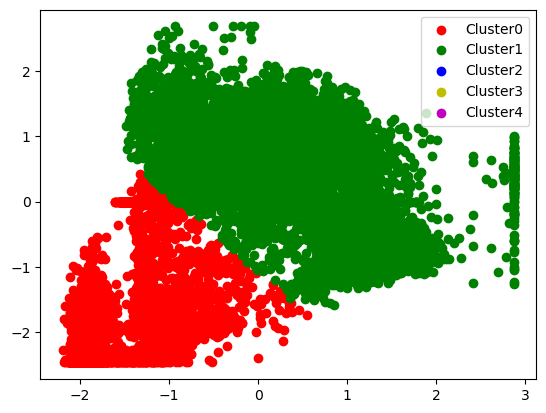

In [98]:
colors = ['r','g','b','y','m']

for i in range(5):
  cluster_data = x[y_kmeans ==i]
  plt.scatter(cluster_data['GR'],
              cluster_data['NPHI'],
              c=colors[i],
              label = f'Cluster{i}')
  plt.legend()

In [100]:
def predict_cluster(GR, NPHI):
  new_data = [[GR,NPHI]]
  cluster = kmeans.predict(new_data)
  return cluster[0]

In [102]:
new_GR = 80
new_NPHI = 0.5

predicted_cluster = predict_cluster(new_GR,new_NPHI)
print(f'This belongs to cluster: {predicted_cluster}') 

This belongs to cluster: 1


C:\Users\Gouri\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [106]:
from sklearn.metrics import silhouette_score
silhouette_avg1 = silhouette_score(x, y_kmeans)            #Silhouette score of kmeans clustering
print(silhouette_avg1)

0.50212114881185


In [108]:
x=df[['RHOB','NPHI','DEPTH_MD','PEF','DTC','GR']]
x.head()

,RHOB,NPHI,DEPTH_MD,PEF,DTC,GR
0,-0.759999,-0.008241,-1.731721,2.358218,1.179232,0.648114
1,-0.741163,-0.008241,-1.731532,2.358218,1.161958,0.612133
2,-0.718560,-0.008241,-1.731342,2.358218,1.147887,0.441774
3,-0.734045,-0.008241,-1.731152,2.358218,1.147096,0.367235
4,-0.773944,-0.008241,-1.730963,2.358218,1.146405,0.323128


In [110]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

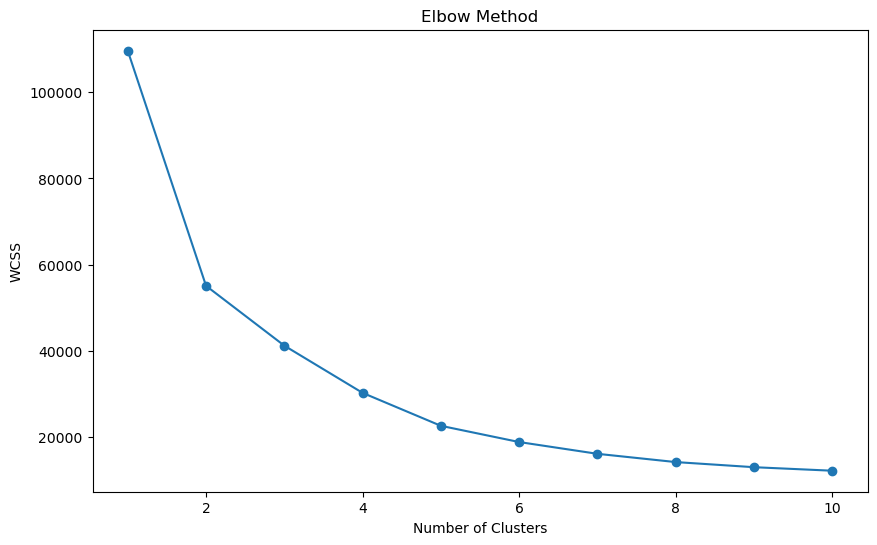

In [112]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [114]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

In [116]:
df['Cluster'] = y_kmeans
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Std_RHOB,Std_GR,Std_DEPTH_MD,Std_NPHI,Std_PEF,Std_DTC,Cluster
0,-0.759999,0.648114,-1.731721,-0.008241,2.358218,1.179232e+00,-0.759999,0.648114,-1.731721,-0.008241,2.358218,1.179232e+00,0
1,-0.741163,0.612133,-1.731532,-0.008241,2.358218,1.161958e+00,-0.741163,0.612133,-1.731532,-0.008241,2.358218,1.161958e+00,0
2,-0.718560,0.441774,-1.731342,-0.008241,2.358218,1.147887e+00,-0.718560,0.441774,-1.731342,-0.008241,2.358218,1.147887e+00,0
3,-0.734045,0.367235,-1.731152,-0.008241,2.358218,1.147096e+00,-0.734045,0.367235,-1.731152,-0.008241,2.358218,1.147096e+00,0
4,-0.773944,0.323128,-1.730963,-0.008241,2.358218,1.146405e+00,-0.773944,0.323128,-1.730963,-0.008241,2.358218,1.146405e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18265,1.745819,-1.683564,1.731081,-1.901628,0.124652,4.651740e-16,1.745819,-1.683564,1.731081,-1.901628,0.124652,4.900644e-16,1
18266,1.789158,-1.605864,1.731271,-1.921165,0.124652,4.651740e-16,1.789158,-1.605864,1.731271,-1.921165,0.124652,4.900644e-16,1
18267,1.917421,-1.559734,1.731461,-2.004161,0.124652,4.651740e-16,1.917421,-1.559734,1.731461,-2.004161,0.124652,4.900644e-16,1
18268,2.109002,-1.574822,1.731650,-2.016885,0.124652,4.651740e-16,2.109002,-1.574822,1.731650,-2.016885,0.124652,4.900644e-16,1


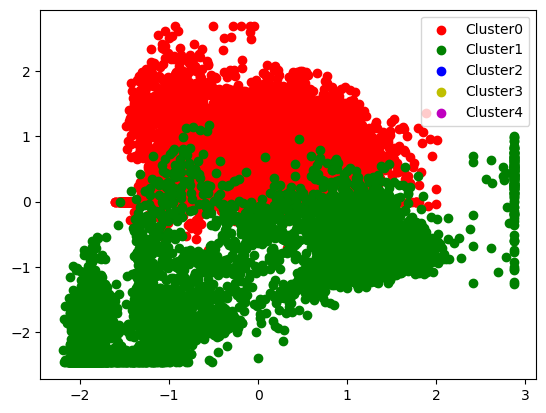

In [118]:
colors = ['r','g','b','y','m']

for i in range(5):
  cluster_data = x[y_kmeans ==i]
  plt.scatter(cluster_data['GR'],
              cluster_data['NPHI'],
              c=colors[i],
              label = f'Cluster{i}')
  plt.legend()

In [124]:
def predict_cluster(RHOB,NPHI,DEPTH_MD,PEF,DTC,GR):
  new_data = [[RHOB,NPHI,DEPTH_MD,PEF,DTC,GR]]
  cluster = kmeans.predict(new_data)
  return cluster[0]

In [128]:
new_GR = 80
new_NPHI = 0.5
new_DEPTH_MD = 32
new_PEF = 2.5
new_DTC = 160
new_RHOB = 2
predicted_cluster = predict_cluster(new_GR,new_NPHI, new_DEPTH_MD, new_PEF, new_DTC, new_RHOB)
print(f'This belongs to cluster: {predicted_cluster}') 

C:\Users\Gouri\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


This belongs to cluster: 0


In [130]:
from sklearn.metrics import silhouette_score
silhouette_avg1 = silhouette_score(x, y_kmeans)            #Silhouette score of kmeans clustering
print(silhouette_avg1)

0.4896015531469686
